# Assignment 3
_Due: Midnight on Tuesday October 8, 2019_

### NetID: lyf6

In this assignment you will gain some experience with decision trees and random forests using two data sets. One is a diabetes data set, where the task is to predict the progression of the disease. The other a data set of real estate listings, where the task is to forecast the sale price of the house.

#### Submission Instructions:

Please fill out this _starter_ Jupyter Notebook, and submit __both__ this `.ipynb` file as well as a pdf file (via html).

 - In the notebook interface, choose `File -> Download as -> Notebook (ipynb)`.
 - In the notebook interface, choose `File -> Download as -> HTML`. Then open the html file, and print to pdf.

Notes:

 - We are using the markdown cell-type for texts (and latex), and the code cell-type for the python code. Make sure you don't mix these up. You can change the type from the dropdown at the toolbar on the top.
 

In [3]:
import numpy as np
import matplotlib as plot
import matplotlib.pyplot as plt

## Question 1: Regression trees vs. random forests (20 pts)

This problem is based on the `diabetes` dataset from the `sklearn` package. Please read about the dataset at [https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset). We will seek to predict the response, which is a quantitative measure of diabetes progression one year after baseline, using regression trees and random forests.

The following cell imports the dataset as `diabetes` and names the predictor variables `diabetes_x` and the response `diabetes_y`. The names of the six predictor variables are also printed. For a more detailed description, use the `.DESCR` aspect of `diabetes`.

In [440]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
diabetes_x = diabetes.data
diabetes_y = diabetes.target
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### Part (a): Building a Simple Regression Tree

To start we will manually build a regression tree using only two of the predictor variables: `bmi` and `s5`. To keep things simple, build a tree that has exactly three nodes and four leaves. (i.e. the data is split into two parts initially and then each of those parts is again split one more time.) At each node you will need to evaluate each possible splitting point for both `bmi` and `s5` and pick the one that minimizes the RSS.

When you have built the regression tree, create a scatter plot of `s5` versus `bmi`, color-coded by the response variable. In this plot, use vertical and horizontal lines to indicate the regions that your tree splits the data into. You may find the functions `plt.hlines()` and `plt.vlines()` to be useful.

In [452]:
bmi = diabetes_x[:,2]
s5 = diabetes_x[:,8]
rss_bmi = []
rss_s5 = []

# we put a wrapper on the np.mean function to avoid warnings from taking the average of an empty list
def average(x):
    if len(x) == 0:
        return(0.0)
    else:
        return(np.mean(x))

# the following starter code finds the best splits for bmi and bp at the root
for i in range(len(bmi)):
    left = np.where(bmi <= bmi[i])[0]
    right = np.where(bmi > bmi[i])[0]
    rss_bmi.append(np.sum((diabetes_y[left] - average(diabetes_y[left]))**2) + 
                   np.sum((diabetes_y[right] - average(diabetes_y[right]))**2))
    left = np.where(s5 <= s5[i])[0]
    right = np.where(s5 > s5[i])[0]
    rss_s5.append(np.sum((diabetes_y[left] - average(diabetes_y[left]))**2) + 
                  np.sum((diabetes_y[right] - average(diabetes_y[right]))**2))
    
best_bmi_cut = np.argmin(rss_bmi)
best_s5_cut = np.argmin(rss_s5)

print("RSS bmi: "+str(rss_bmi[best_bmi_cut]))
print("RSS s5: "+str(rss_s5[best_s5_cut]))
print("Cut at s5 = "+str(s5[best_s5_cut]))

RSS bmi: 1891390.8257739856
RSS s5: 1856875.7980013108
Cut at s5 = -0.00421985970694603


In [453]:
#s5's RSS is lower so we cut using RSS
index1 = [index for index,value in enumerate(s5) if value > s5[best_s5_cut]]
index2 = [index for index,value in enumerate(s5) if not value > s5[best_s5_cut]]

bmi1 = bmi[index1]
bmi2 = bmi[index2]

s51 = s5[index1]
s52 = s5[index2]

diabetes_y1 = diabetes_y[index1]
diabetes_y2 = diabetes_y[index2]

In [466]:
rss_bmi1 = []
rss_s51 = []

for i in range(len(bmi1)):
    left = np.where(bmi1 <= bmi1[i])[0]
    right = np.where(bmi1 > bmi1[i])[0]
    rss_bmi1.append(np.sum((diabetes_y1[left] - average(diabetes_y1[left]))**2) + 
                   np.sum((diabetes_y1[right] - average(diabetes_y1[right]))**2))
    left = np.where(s51 <= s51[i])[0]
    right = np.where(s51 > s51[i])[0]
    rss_s51.append(np.sum((diabetes_y1[left] - average(diabetes_y1[left]))**2) + 
                  np.sum((diabetes_y1[right] - average(diabetes_y1[right]))**2))
    
best_bmi_cut = np.argmin(rss_bmi1)
best_s5_cut = np.argmin(rss_s51)

print("RSS bmi: "+str(rss_bmi1[best_bmi_cut]))
print("RSS s5: "+str(rss_s51[best_s5_cut]))
print("Cut at bmi = "+str(bmi1[best_bmi_cut]))

RSS bmi: 926994.6334610472
RSS s5: 1036186.2521546418
Cut at bmi = 0.0142724752679289


In [444]:
#s5's RSS is lower so we cut using RSS
index1a = [index for index,value in enumerate(bmi1) if value > bmi1[best_bmi_cut]]
index1b = [index for index,value in enumerate(bmi1) if not value > bmi1[best_bmi_cut]]

bmi1a = bmi1[index1a]
bmi1b = bmi1[index1b]

s51a = s51[index1a]
s51b = s51[index1b]

diabetes_y1a = diabetes_y1[index1a]
diabetes_y1b = diabetes_y1[index1b]

In [445]:
rss_bmi2 = []
rss_s52 = []

for i in range(len(bmi2)):
    left = np.where(bmi2 <= bmi2[i])[0]
    right = np.where(bmi2 > bmi2[i])[0]
    rss_bmi2.append(np.sum((diabetes_y2[left] - average(diabetes_y2[left]))**2) + 
                   np.sum((diabetes_y2[right] - average(diabetes_y2[right]))**2))
    left = np.where(s52 <= s52[i])[0]
    right = np.where(s52 > s52[i])[0]
    rss_s52.append(np.sum((diabetes_y2[left] - average(diabetes_y2[left]))**2) + 
                  np.sum((diabetes_y2[right] - average(diabetes_y2[right]))**2))
    
best_bmi_cut = np.argmin(rss_bmi2)
best_s5_cut = np.argmin(rss_s52)

print("RSS bmi: "+str(rss_bmi2[best_bmi_cut]))
print("RSS s5: "+str(rss_s52[best_s5_cut]))
print("Cut at bmi = "+str(bmi2[best_bmi_cut]))

RSS bmi: 558147.509269628
RSS s5: 653689.5596330275
Cut at bmi = 0.00564997867688165


In [446]:
#s5's RSS is lower so we cut using RSS
index2a = [index for index,value in enumerate(bmi2) if value > bmi2[best_bmi_cut]]
index2b = [index for index,value in enumerate(bmi2) if not value > bmi2[best_bmi_cut]]

bmi2a = bmi2[index2a]
bmi2b = bmi2[index2b]

s52a = s52[index2a]
s52b = s52[index2b]

diabetes_y2a = diabetes_y2[index2a]
diabetes_y2b = diabetes_y2[index2b]

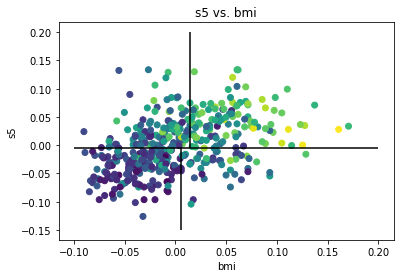

In [447]:
cmap = plot.cm.get_cmap('viridis')
normalize = plot.colors.Normalize(vmin=min(diabetes_y), vmax=max(diabetes_y))
colors = [cmap(normalize(value)) for value in diabetes_y]

plt.scatter(bmi, s5, c=colors)
plt.title('s5 vs. bmi')
plt.xlabel('bmi')
plt.ylabel('s5')

plt.hlines(-0.004219, -0.1, 0.2)
plt.vlines(0.01427, -0.004219, 0.2)
plt.vlines(0.00565, -0.15, -0.004219)
plt.show()

### Part (b) Fitting a Full Regression Tree

Now build a tree that uses all the predictor variables, has a more flexible structure, and is validated with a test set. Split the full dataset into a training set and a test set (50/50). Fit a regression tree to the training set using the function `DecisionTreeRegressor` from `sklearn.tree`. For now, use your best judgment to choose parameters for tree complexity; we will use analytical methods to choose parameters in later parts of this problem set. Some starter code is provided:

In [12]:
import random
indices = random.sample(range(442), 221)
indicesC = [i for i in range(442) if i not in indices]
xtrain = diabetes_x[indices,:]
ytrain = diabetes_y[indices]
xtest = diabetes_x[indicesC,:]
ytest = diabetes_y[indicesC]

In [204]:
from sklearn import tree
regr = tree.DecisionTreeRegressor(criterion='mse', splitter='best', 
                                  min_samples_leaf = 15, max_features = i).fit(xtrain,ytrain)

### Part (c) Plotting the Tree

Plot your regression tree. To do so, we suggest that you use GraphViz in conjunction with `sklearn.tree.export_graphviz`. Once you install GraphViz, the following cell will plot the tree.

Instructions for using GraphViz (Windows):

1. Install GraphViz to your computer from the link [https://graphviz.gitlab.io/download/](https://graphviz.gitlab.io/download/).

2. Install the Python package using `pip install graphviz` or `conda install graphviz`.

3. Set a path to your computer's GraphViz installation (NOT the Python package). You can do so locally in this notebook by running something like `import os; os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'` (substituting in the location of your own GraphViz installation).

4. You can now use the functions in the `graphviz` package with `sklearn.tree.export_graphviz`!

Instructions for using GraphViz (Mac OS):

1. Make sure you have the package manager Homebrew.

2. Install GraphViz to your computer using `brew install graphviz`.

3. Install the Python package using `pip install graphviz` or `conda install graphviz`.

4. You can now use the functions in the `graphviz` package with `sklearn.tree.export_graphviz`! _Note: If you get an ExecutableNotFound error, you might have to set a path to your computer's GraphViz installation (NOT the Python package). You can do so locally in this notebook by running something like `import os; os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'` (substituting in the location of your own GraphViz installation)._


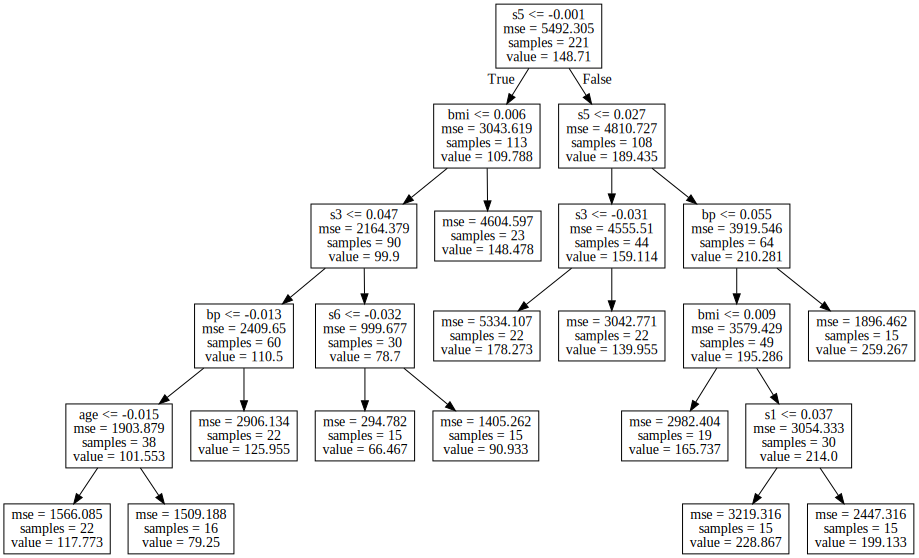

In [205]:
import graphviz
graphviz.Source(tree.export_graphviz(regr, out_file=None, feature_names=diabetes.feature_names))

### Part (d) Evaluation

Interpret your regression tree. What are some examples of variables that seem to correspond with higher or lower measures of diabetes progression? Find the MSE of the model using the test set. The `.predict` method for your model can help with this.

I looked at the splits on the model for variables where having greater values of them led to a greater diabetes model, and vice versa. Examples where an increase in the variable led to an increase in diabetes were bmi, s5 and bp, whereas age, s1, and s3 are examples of variables associated with a decrease in diabetes. This shows that these variables were identified to be more important towards the model.

The model displays considerable mean squared error, which comes from the fact that we have limited the number of trees and therefore it cannot generate predictions specific or fine-tuned to each datapoint. In a previous tree I tried with a much larger number of leaves, the MSE went down considerably, which is to be expected with the constraints we set for the model.

In [206]:
import statistics as stat
from sklearn.metrics import mean_squared_error 
mean_squared_error(regr.predict(xtest),ytest)

4057.362692842495

### Part (e) Random Forest

Now use random forests to analyze the data with the `RandomForestRegressor` function from `sklearn.ensemble`. (Again, you may use your best judgment to choose the initial parameters for tree complexity.)

__(i)__ What test MSE do you obtain, and how does it compare to the test MSE of the regression tree above? 

__(ii)__ According to the model, which variables are most important in predicting diabetes progression? (The `.feature_importances_` method of the model may help with this.)

__(iii)__ Plot the MSE of the prediction against $m$, the number of variables considered at each split.

__(iv)__ Comment on the plot you created and if it makes sense.

In [477]:
from sklearn import ensemble

# Here is an example of how to use the random forest function in sklearn.ensemble.
# The code below assumes that the training inputs and responses are loaded in the variables train_x and train_y
# and that the test predictor variables are in test_x

dtr = ensemble.RandomForestRegressor(min_samples_leaf = 15, max_features = 4, n_estimators = 10)
regr = dtr.fit(xtrain, ytrain)
pred_y = regr.predict(xtest)
mseSum = sum(np.square(ytest-pred_y))
mse = stat.mean(np.square(ytest-pred_y))

# Your Code Here
print("The sum is: " + str(mseSum))
print("The MSE is: " + str(mse))

The sum is: 753681.4753294536
The MSE is: 3410.32341778033


The sum of the squared errors was 753,681, and the MSE was 3410.3 - which turns out to be lower than the decision tree.

In [159]:
regr.feature_importances_

array([0.0016167 , 0.00523389, 0.34387247, 0.14749199, 0.00973636,
       0.03288653, 0.09031844, 0.05733238, 0.2736852 , 0.03782604])

Based on the feature_importance values, bmi contributed the most towards the prediction, followed by s5, and then by bp.

In [215]:
MSEs = []
for i in range(1,10):
    dtr = ensemble.RandomForestRegressor(min_samples_leaf = 15, n_estimators = 10, max_features = i)
    regr = dtr.fit(xtrain, ytrain)
    pred_y = regr.predict(xtest)
    mse = sum(np.square(ytest-pred_y))
    MSEs.append(mse)

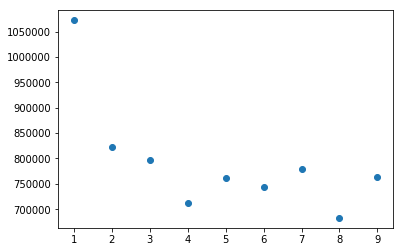

In [216]:
plt.scatter(range(1,10),MSEs)

The MSE drops drastically, then fluctuates between m = 2 to m = 8, before proceeding to rise again. This agrees with our general idea that the more variables are considered, the lower the error will be. We expect however that it will rise again with a further increase in variables, because it will overfit and variance with therefore increase, leading to a rise in MSE. This follows from what we know about MSE that it follows a quadratic form (at low m, bias is high, and at high m, variance is high, which will both lead to higher MSEs). 

## Question 2: Analyzing Real Estate Data (40 pts)

In this problem, you will train random forests on data from the website Zillow to forecast the sale price of real estate listings. Random forests are nonparametric methods for classification and regression. As discussed in class, the method is based on the following idea: a good predictor will have low bias and low variance. A deep decision tree has low bias, but high variance. To reduce the variance, multiple trees are fit and averaged together. By introducing randomness in the construction of the trees, the correlation between them is reduced, to facilitate the variance reduction.

Read in the training and test sets as follows:

`import pandas as pd
train = pd.read_csv("zillow_train.csv")
test = pd.read_csv("zillow_test.csv")`

Use the following variables: `Lat`, `Long`, `ListPrice`, `SaleYear`, `Bathroom`, `Bedroom`, `BuildDecade`, `MajorRenov`, `FinishSqFt`, `LotSqFt`, `MSA`, `City`, `HighSchool`, `SalePrice`. You will build regression models to predict `SalePrice`.


### (a) Explore the data

Get an idea of what kind of data you're working with. As usual, you might ask yourself what $n$ (sample size) and $p$ (number of predictor variables) are here. Make plots of the distributions of the variables. Include a plot of the response, `SalePrice`. Does it appear that the data are "raw", or have they been pre-processed in different ways? If so, how?

In [512]:
import pandas as pd
train = pd.read_csv("zillow_training.csv")
test = pd.read_csv("zillow_testing.csv")
train = train[['Lat', 'Long', 'ListPrice', 'SaleYear', 'Bathroom', 'Bedroom', 'BuildDecade', 'MajorRenov', 'FinishSqFt', 'LotSqFt', 'MSA', 'City', 'HighSchool', 'SalePrice']]
test = test[['Lat', 'Long', 'ListPrice', 'SaleYear', 'Bathroom', 'Bedroom', 'BuildDecade', 'MajorRenov', 'FinishSqFt', 'LotSqFt', 'MSA', 'City', 'HighSchool', 'SalePrice']]

n = 77728, p = 13

Based on the histograms, they appear to be in sensible ranges. Furthermore, there are no more outliers, thus the data could have been preprocessed already. Most price variables also appear skewed to the right, however upon research it appears this is a natural trend in price data. 

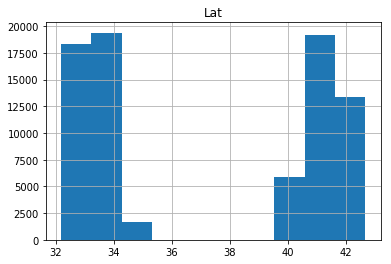

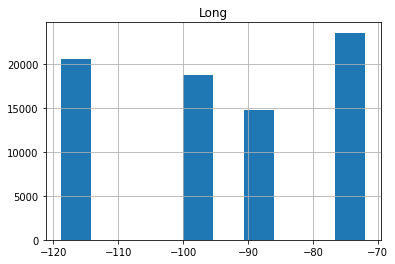

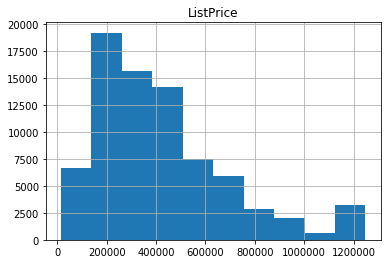

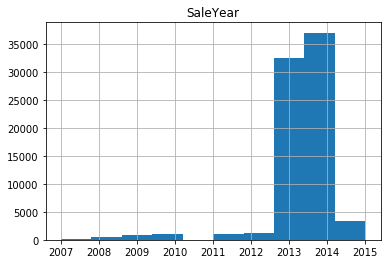

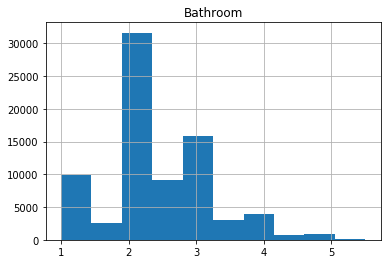

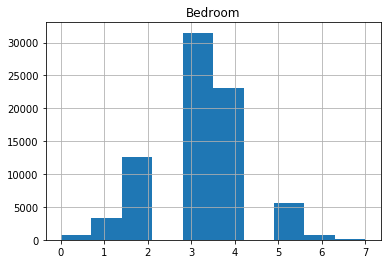

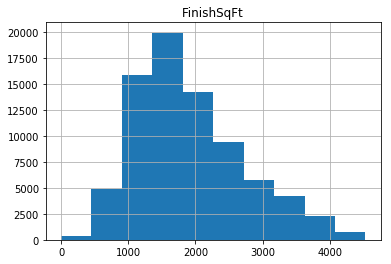

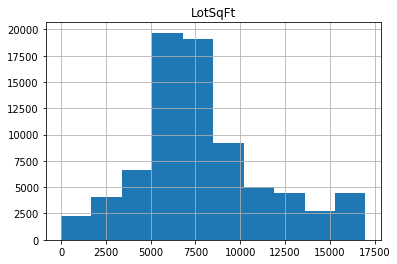

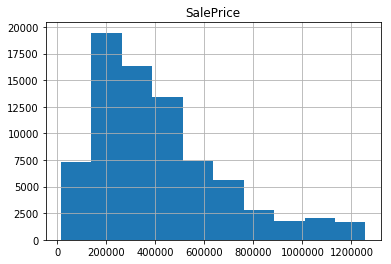

In [509]:
for i in ['Lat', 'Long', 'ListPrice', 
          'SaleYear', 'Bathroom', 'Bedroom', 
          'FinishSqFt', 'LotSqFt', 'SalePrice']:
    train.hist(column=i)

### Part (b) Preliminary steps

__(i)__ Some of the variables in the data are categorical; how many values do they take? (You may find the `.nunique` method of pandas to be useful here.) Why might factor variables with many categories present a problem when fitting decision trees? Describe a couple different ways of handling factor variables when fitting decision trees.


In [510]:
for item in train.columns:
    print(item + ": " + str(train[item].nunique()))

Lat: 72960
Long: 73090
ListPrice: 4774
SaleYear: 9
Bathroom: 10
Bedroom: 8
BuildDecade: 29
MajorRenov: 113
FinishSqFt: 6222
LotSqFt: 10374
MSA: 4
City: 1289
HighSchool: 654
SalePrice: 5052


Having variables with such a large number of categories will greatly complicate a decision tree, and pose problems to the interpretability and complexity of the model.

Categorical values such as city and high school are 2 such categories, and since creating dummy variables or doing ordination would still severely complicate the model, I decided to remove them. There are also a number of missing values from BuildDecade, and we have no strong basis to say that the decade can be imputed based on the other values, thus I decided to remove it.

MSA has 4 values, so it can be converted into dummy variables. 

Although year is technically a categorical variable, it can be treated as a number for better interpretability and use in the decision tree.

Finally, MajorRenov could simply be converted into a 'yes' or 'no' variable (1/0)

__(ii)__ Use your best judgement to modify the Zillow dataset to handle factor variables. In addition to `pandas` and `numpy`, it might be helpful to look at functions in `sklearn.preprocessing`.

In [513]:
train = train.drop(['City','HighSchool','BuildDecade'],axis=1)
test = test.drop(['City','HighSchool','BuildDecade'],axis=1)

trainDummies = pd.get_dummies(train['MSA'])
train = pd.concat([train, trainDummies], axis=1)
testDummies = pd.get_dummies(test['MSA'])
test = pd.concat([test, testDummies], axis=1)

train = train.drop(['MSA'],axis=1)
test = test.drop(['MSA'],axis=1)

MajorRenov = []
for item in pd.to_numeric(train["MajorRenov"], errors='coerce'):
    if math.isnan(item):
        MajorRenov.append(0)
    else:
        MajorRenov.append(1)
train["MajorRenov"] = MajorRenov

MajorRenov = []
for item in pd.to_numeric(test["MajorRenov"], errors='coerce'):
    if math.isnan(item):
        MajorRenov.append(0)
    else:
        MajorRenov.append(1)
test["MajorRenov"] = MajorRenov

train["SaleYear"] = pd.to_numeric(train["SaleYear"], errors='coerce')
test["SaleYear"] = pd.to_numeric(test["SaleYear"], errors='coerce')

__(iii)__ We will soon use a few methods to predict `SalePrice`. Throughout, we will evaluate the predictions in terms of the absolute relative error:

<center>$\frac{1}{n}\sum_{i=1}^n \frac{\mid Y_i - \hat{Y}_i\mid}{Y_i}$</center>

Explain why this is a more appropriate choice of accuracy, compared with squared error.

The absolute relative error measures the average percent deviation, which basically answers the question - on average, how far in percent is the price prediction from what it really is? If we used the squared error, we would be penalizing larger deviation (i.e. predictions with bigger deviation add more error to our sum), which we don't intend to penalize.

### Part (c) Build models using random forests

Build random forest models to predict `SalePrice` from the other variables, using the appropriate method from `sklearn.ensemble`. As in Question 1, one parameter to vary is `max_features`, or the number of variables allowed in each split; this regulates the correlation between the trees in the random forest by introducing randomness. Two more relevant parameters are `n_estimators` and `min_samples_leaf`, or number of trees and minimum node size, which regulate variance and bias.

Train several random forest models, each time using different values of the parameters. Evaluate each model using 5-fold cross-validation (`sklearn.model_selection.KFold` may be a useful resource to perform k-fold cross-validation). For the sake of time, you may keep `n_estimators` low and constant. First vary `max_features` and create a plot of the cross-validation error versus the value of this parameter. Next vary `min_samples_leaf` a create a similar plot with the values of this parameter. 

Comment on how cross-validation error relates to `max_features` and `min_samples_leaf`, and how do you imagine it would relate to `n_estimators`? Does this make sense to you?

Now find a combination of values for `max_features` and `min_samples_leaf` that approximately minimizes the cross-validation error. 

_Note: Use mean absolute error (`mae`) rather than mean squared error (`mse`) as the criterion for growing the trees. But then when you evaluate different models, compute the relative absolute error, as described above._

In [532]:
#Starter Code to fill in and complete
from sklearn import model_selection
kf = model_selection.KFold(n_splits=5)

x = train.drop(['SalePrice'], axis=1)
y = train['SalePrice']

MSEfeatures = []
MAEfeatures = []

for m in [1,3,5,7]: # vary max_features
    print("Running: max_features = "+str(m))
    dtr = ensemble.RandomForestRegressor(n_estimators = 3, 
                                         min_samples_leaf = 3,
                                         max_features = m, 
                                         criterion = 'mae')
    maeCount = 0
    mseCount = 0
    for train_index, test_index in kf.split(x):
        
        train_x = x.iloc(axis=0)[train_index,:]
        train_y = y[train_index]
        test_x = x.iloc(axis=0)[test_index,:]
        test_y = y[test_index]
        
        regr = dtr.fit(train_x, train_y)       
        pred_y = regr.predict(test_x)
        
        mae = sum(abs((test_y-pred_y)/test_y))
        mse = sum((test_y-pred_y)**2)
        maeCount += mae
        mseCount += mse
    
    MAEfeatures.append(maeCount/len(x))
    MSEfeatures.append(mseCount/len(x))

Running: max_features = 1
Running: max_features = 3
Running: max_features = 5
Running: max_features = 7


In [535]:
kf = model_selection.KFold(n_splits=5)

x = train.drop(['SalePrice'], axis=1)
y = train['SalePrice']

MSEsamples = []
MAEsamples = []

for m in [1,3,5,7]: # vary min_samples_leaf
    print("Running: min_samples_leaf = "+str(m))
    dtr = ensemble.RandomForestRegressor(n_estimators = 3, 
                                         min_samples_leaf = m,
                                         max_features = 7, 
                                         criterion = 'mae')
    maeCount = 0
    mseCount = 0
    for train_index, test_index in kf.split(x):
        
        train_x = x.iloc(axis=0)[train_index,:]
        train_y = y[train_index]
        test_x = x.iloc(axis=0)[test_index,:]
        test_y = y[test_index]
        
        regr = dtr.fit(train_x, train_y)       
        pred_y = regr.predict(test_x)
        
        mae = sum(abs((test_y-pred_y)/test_y))
        mse = sum((test_y-pred_y)**2)
        maeCount += mae
        mseCount += mse
    
    MAEsamples.append(maeCount/len(x))
    MSEsamples.append(mseCount/len(x))

Running: min_samples_leaf = 1
Running: min_samples_leaf = 3
Running: min_samples_leaf = 5
Running: min_samples_leaf = 7


Text(0, 0.5, 'MSE')

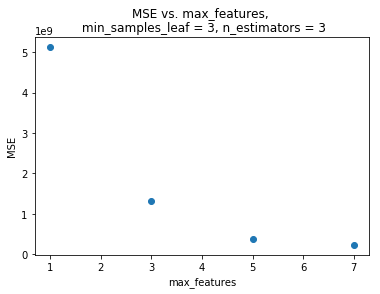

In [534]:
plt.scatter([1,3,5,7], MSEfeatures)
plt.title('MSE vs. max_features, \n min_samples_leaf = 3, n_estimators = 3')
plt.xlabel('max_features')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

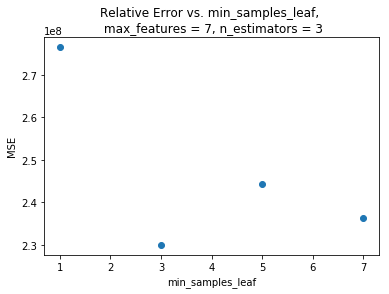

In [536]:
plt.scatter([1,3,5,7], MSEsamples)
plt.title('Relative Error vs. min_samples_leaf, \n max_features = 7, n_estimators = 3')
plt.xlabel('min_samples_leaf')
plt.ylabel('MSE')

In the first plot, we see that increasing max_features (the number of variables allowed in each split) leads to a decrease in MSE.

Increasing max_features allows the predictions to become more accurate, since the model has more information with which to generate predictions. This decreases the bias and in turn decreases the MSE. Continuing to increase the number of predictors however will lead to a more complex model, which will increase variance and in turn increase the MSE.

In the second plot, we see that increasing min_samples_leaf (how big each final leaf can be) produces no clear pattern in the MSE, although there is a considerable drop after a min_samples_leaf of 1.

Increasing min_samples_leaf implicitly controls how deep the tree grows. A bigger min_samples_leaf will mean less leaves, and thus a shallower tree, whereas a smaller min_samples_leaf means more leaves and a deeper tree. With a deeper tree, predictions become more specific, which improves the prediction accuracy and decreases the bias of the model. However, continuing to increase the depth will increase variance in prediction, and increase the MSE.

### Part (d) Comparison to Least-Squares Regression

Now build a least-squares linear model for the response variable as a function of the predictor variables using the training set. You may wish to use the `sklearn.linear_model.LinearRegression` function, described
[here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Experiment with different subsets of the predictor variables included in the linear model. 

Using the random forest model from Part (c) with the best combination of values for `max_features` and `min_samples_leaf` that you found, compare both the mean squared error and the relative absolute error on the test set from the random forest and linear models.

Which model does a better job at prediction? Do you think the model with the higher MSE has higher variance or higher bias, or both?

In [530]:
from sklearn.linear_model import LinearRegression
kf = model_selection.KFold(n_splits=5)

mse1 = 0
mse2 = 0
mse3 = 0
mse4 = 0

mae1 = 0
mae2 = 0
mae3 = 0
mae4 = 0

x = train.drop(['SalePrice'], axis=1)
y = train['SalePrice']

for train_index, test_index in kf.split(x):
    train_x = x.iloc(axis=0)[train_index,:]
    train_y = y[train_index]
    test_x = x.iloc(axis=0)[test_index,:]
    test_y = y[test_index]
    
    reg1 = LinearRegression().fit(train_x[['FinishSqFt','Bedroom','SaleYear']], train_y)
    reg2 = LinearRegression().fit(train_x[['FinishSqFt','Bedroom','SaleYear','MajorRenov']], train_y)
    reg3 = LinearRegression().fit(train_x[['FinishSqFt','Bedroom','Bathroom','MajorRenov','SaleYear']], train_y)
    reg4 = LinearRegression().fit(train_x, train_y)
    
    pred1 = reg1.predict(test_x[['FinishSqFt','Bedroom','SaleYear']])
    pred2 = reg2.predict(test_x[['FinishSqFt','Bedroom','SaleYear','MajorRenov']])
    pred3 = reg3.predict(test_x[['FinishSqFt','Bedroom','Bathroom','MajorRenov','SaleYear']])
    pred4 = reg4.predict(test_x)

    mse1 += sum((test_y-pred1)**2)
    mse2 += sum((test_y-pred2)**2)
    mse3 += sum((test_y-pred3)**2)
    mse4 += sum((test_y-pred4)**2)

    mae1 += sum(abs((test_y-pred1)/test_y))
    mae2 += sum(abs((test_y-pred2)/test_y))
    mae3 += sum(abs((test_y-pred3)/test_y))
    mae4 += sum(abs((test_y-pred4)/test_y))

mse1 /= len(x)
mse2 /= len(x)
mse3 /= len(x)
mse4 /= len(x)

mae1 /= len(x)
mae2 /= len(x)
mae3 /= len(x)
mae4 /= len(x)

In [548]:
print("Minimum Linear MSE: " + str(round(min([mse1, mse2, mse3, mse4]))))
print("Minimum Random Forest MSE (Changing Samples): " + str(round(min(MSEsamples))))
print("Minimum Random Forest MSE (Changing Features): " + str(round(min(MSEfeatures))))

print("Minimum Linear MAE: " + str(min([mae1, mae2, mae3, mae4])))
print("Minimum Random Forest MAE (Changing Samples): " + str(min(MAEsamples)))
print("Minimum Random Forest MAE (Changing Features): " + str(min(MAEfeatures)))

Minimum Linear MSE: 204544306
Minimum Random Forest MSE (Changing Samples): 229985464
Minimum Random Forest MSE (Changing Features): 228050435
Minimum Linear MAE: 0.02538366515103238
Minimum Random Forest MAE (Changing Samples): 0.026964513458504
Minimum Random Forest MAE (Changing Features): 0.026987907728877457


5-fold cross validation was performed to generate the linear models, and it was the complete model which generated the least error. Comparing the complete model to the random forest model, the MSE and MAE are lower in the linear model compared to random forest.

We restricted the model to a relatively small number of predictors per leaf (low max_features), although we allowed it to grow quite deep (low min_samples_leaf). Using only a few predictors means that we obtain a high bias, while using a deep tree means we obtain high variance. Therefore, we suspect that the MSE of the random forest resulted from both bias and variance.

### Part (e) Predicting SalePrice

Read in the file "zillow_part_e.csv" which has 7000 houses with all the same variables as the training and testing set, except that the SalePrice variable is missing. 

Construct the best model you can on the training data. You can use random forests, or you may try to use gradient tree boosting, which is also available in sklearn.ensemble.  

Using your best model, predict the sale prices for these 7000 houses. Students will be assigned extra credit according to which decile they are in for the predictive accuracy (relative absolute error). (The top 10% will receive 10 points extra credit, the next 10% 9 points, and so on.) 

Save your predictions in a file called "zillow_predictions.csv" and submit this file with your homework. Your csv file should only contain a single column of predictions, without a header, where the $i$-th row corresponds to the predicted sale price for the $i$-th row of the dataset read in from "zillow_part_e.csv", excluding the header.


In [538]:
newdata = pd.read_csv("zillow_part_e.csv")
newdata = newdata[['Lat', 'Long', 'ListPrice', 'SaleYear', 'Bathroom', 'Bedroom', 'BuildDecade', 'MajorRenov', 'FinishSqFt', 'LotSqFt', 'MSA', 'City', 'HighSchool']]

In [539]:
newdata = newdata.drop(['City','HighSchool','BuildDecade'],axis=1)

newDummies = pd.get_dummies(newdata['MSA'])
newdata = pd.concat([newdata, newDummies], axis=1)

newdata = newdata.drop(['MSA'],axis=1)

MajorRenov = []
for item in pd.to_numeric(newdata["MajorRenov"], errors='coerce'):
    if math.isnan(item):
        MajorRenov.append(0)
    else:
        MajorRenov.append(1)
newdata["MajorRenov"] = MajorRenov

newdata["SaleYear"] = pd.to_numeric(newdata["SaleYear"], errors='coerce')

In [540]:
dtr = ensemble.RandomForestRegressor(n_estimators = 3, 
                                         min_samples_leaf = 3,
                                         max_features = 7,
                                         criterion = 'mae')

regr = dtr.fit(train.drop(['SalePrice'],axis=1),train['SalePrice'])       
pred_y = regr.predict(newdata)

In [549]:
import csv
csvData = {'pred_y': pred_y}
csvData = pd.DataFrame(csvData)
csvData.to_csv('/Users/lorenzoflores/Desktop/Yale_Academic/S&DS 355/HW3/zillow_predictions.csv')